In [1]:
import numpy as np

import nsfg_copy
import first
import thinkstats2
import thinkplot
import math

In [2]:
pregDf = nsfg_copy.ReadFemPreg()

In [3]:
pregDf.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [4]:
respDf = nsfg_copy.ReadFemResp()

In [5]:
pregDf.pregnum.value_counts().sort_index()

1     1267
2     2864
3     3330
4     2444
5     1525
6      900
7      560
8      320
9      189
10      90
11      33
12      24
14      28
19      19
Name: pregnum, dtype: int64

In [6]:
respDf.pregnum.value_counts().sort_index()

0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64

In [7]:
nsfg_copy.ValidatePregnum(respDf,pregDf)

True

In [8]:
pregDf.birthord.value_counts(sort=True)


1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

In [9]:
pregDf.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

In [10]:
pregDf.totalwgt_lb.mean()

7.265628457623368

In [11]:
pregDf['totalwgt_kg'] = pregDf.totalwgt_lb * 0.453592

pregDf.totalwgt_kg.value_counts(sort=True)

3.401940    302
3.175144    301
3.345241    285
3.628736    265
3.486988    220
           ... 
5.896696      1
0.652038      1
5.273007      1
0.822136      1
7.002326      1
Name: totalwgt_kg, Length: 184, dtype: int64

In [12]:
respDf.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

In [13]:
respDf[respDf.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

In [14]:
pregDf[pregDf.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

In [15]:
pregDf[pregDf.caseid==5012].totalwgt_lb[pregDf.pregordr ==1]

5515    6.0
Name: totalwgt_lb, dtype: float64

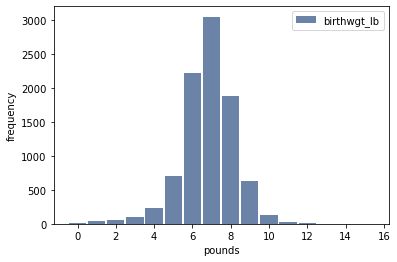

<Figure size 576x432 with 0 Axes>

In [16]:
live = pregDf[pregDf.outcome == 1]
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

 

In [17]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
 

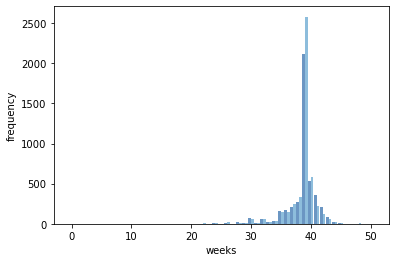

<Figure size 576x432 with 0 Axes>

In [18]:
first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency')



In [19]:
mean = live.prglngth.mean()
#var = live.prglngth.var()
#std = live.prglngth.std()
meanOther = others.prglngth.mean()

In [20]:
mean > meanOther

True

In [21]:
modefrt = live.prglngth.mode()
modeother = others.prglngth.mode()

In [22]:
modefrt > modeother

0    False
dtype: bool

In [23]:
medfrt = live.prglngth.median()
medeother = others.prglngth.median()

In [24]:
medfrt > medeother

False

#2-1 First born come early?
I used summary statistivcs to come up with possible answer. The mean, mode, median of the data for first born and others, that first bone don't come early
we can tell, by mean of first birth being longer, and mode/median being smaller than the first born length. 




In [25]:
firstswgt = live.totalwgt_lb.mean()
otherswgt = others.totalwgt_lb.mean()

In [26]:
firstswgt > otherswgt

False

In [27]:
firstswgtmode = live.totalwgt_lb.mode()
otherswgtmode = others.totalwgt_lb.mode()


In [28]:
firstswgtmode > otherswgtmode

0    True
dtype: bool

In [29]:
firstswgtmed = live.totalwgt_lb.median()
otherswgtmed = others.totalwgt_lb.median()

In [30]:
firstswgtmed > otherswgtmed

False

In [31]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
  
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [32]:
CohenEffectSize(live.totalwgt_lb,others.totalwgt_lb)

-0.04291208601020428

#2-4 
No effect size using cohen d, meaning with the samples we have no correlation, or they is no differnce in the means of the data varibles for first and others wieght during birth. Even if mean, median, mode, we have higher mode of others, but lower mean than other. I would say our data shows that length and birth wieght have no effect on what order than come looking relationship with cohen d, and the sample size of first borns be limited. 

In [33]:
CohenEffectSize(live.prglngth,others.prglngth)

0.01408267027786189